In [1]:
import netCDF4 as nc
from matplotlib import pyplot as plt
import numpy as np
import glob
import pickle
from salishsea_tools import evaltools as et
import datetime as dt
import os
import re
import cmocean
%matplotlib inline

In [2]:
with nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc') as mesh:
    tmask=mesh.variables['tmask'][0,:,:,:]
    e1t=np.expand_dims(mesh.variables['e1t'][:,:,:],1)
    e2t=np.expand_dims(mesh.variables['e2t'][:,:,:],1)
    e3t0=mesh.variables['e3t_0'][:,:,:,:]
SOGtmaskPath='/ocean/eolson/MEOPAR/northernNO3PaperCalcs/save/SOGtmask.pkl'
(tmaskSOG,_,_,_,_)=pickle.load(open(SOGtmaskPath,'rb'))

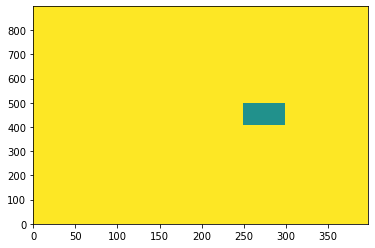

In [3]:
tmask2=np.copy(tmaskSOG)
tmask2[0,:,:,:250]=2
tmask2[0,:,:,300:]=2
tmask2[0,:,:410,:]=2
tmask2[0,:,500:,:]=2
plt.pcolormesh(tmask2[0,0,:,:])

In [4]:
idir='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestnoSMS/'
idir2='/data/eolson/results/MEOPAR/SS36runs/CedarRuns/shortTestTRD/'

In [5]:
fP=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_dian_T*.nc')[0])

In [6]:
fP2=nc.Dataset(glob.glob(idir2+'/SalishSea_1d_*_dian_T*.nc')[0])

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(3,6))


In [7]:
fP.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'deptht', 'deptht_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'time_instant', 'time_instant_bounds', 'RIVNO3', 'PHYSTRNO3', 'ALLTRNO3', 'NO3_E3TSNAP', 'ATF_NO3', 'RDB_NO3', 'RDN_NO3'])

In [8]:
np.max(np.ma.masked_where(tmask==0,fP.variables['ATF_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['ATF_NO3'][0,:,:,:]))

(545.99677, -1.8279446)

In [9]:
np.max(np.ma.masked_where(tmask==0,fP2.variables['ATF_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP2.variables['ATF_NO3'][0,:,:,:]))

(1.4866695, -2.6189249)

In [10]:
np.max(np.ma.masked_where(tmask==0,fP.variables['RDB_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['RDB_NO3'][0,:,:,:]))

(0.13636784, 0.0)

In [11]:
np.max(np.ma.masked_where(tmask==0,fP2.variables['RDB_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP2.variables['RDB_NO3'][0,:,:,:]))

(0.0, 0.0)

In [12]:
np.max(np.ma.masked_where(tmask==0,fP.variables['RDN_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP.variables['RDN_NO3'][0,:,:,:]))

(1.3685015, 0.0)

In [13]:
np.max(np.ma.masked_where(tmask==0,fP2.variables['RDN_NO3'][0,:,:,:])),np.min(np.ma.masked_where(tmask==0,fP2.variables['RDN_NO3'][0,:,:,:]))

(0.0, 0.0)

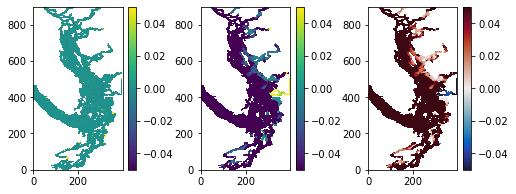

In [14]:
fig,ax=plt.subplots(1,3,figsize=(8,3))
fig.subplots_adjust(wspace=.5)
m0=ax[0].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,fP.variables['ATF_NO3'][0,0,:,:]),vmin=-.05,vmax=.05)
plt.colorbar(m0,ax=ax[0])
m1=ax[1].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,fP2.variables['ATF_NO3'][0,0,:,:]),vmin=-.05,vmax=.05)
plt.colorbar(m1,ax=ax[1])
m2=ax[2].pcolormesh(np.ma.masked_where(tmask[0,:,:]==0,
                    fP.variables['ATF_NO3'][0,0,:,:]-fP2.variables['ATF_NO3'][0,0,:,:]),
                    cmap=cmocean.cm.balance,vmin=-.05,vmax=.05)
plt.colorbar(m2,ax=ax[2])

In [19]:
np.shape(tmaskSOG)

(1, 40, 898, 398)

In [ ]:
#look at Asselin filter distribution in original TRD run:
fig,ax=plt.subplots(1,1,figsize=(3,6))
for ii in range(0,398):
    for jj in range(0,898):
        if tmaskSOG[0,0,jj,ii]==1:
            ax.plot(np.ma.masked_where(tmask[:,jj,ii]==0,fP2.variables['ATF_NO3'][-1,:,jj,ii]/e3t0[0,:,jj,ii]),'k-')

In [70]:
physSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['PHYSTRNO3'][:,:,:,:],3),2),1)
allSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['ALLTRNO3'][:,:,:,:],3),2),1)
rivSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['RIVNO3'][:,:,:,:],3),2),1)
afiltSum=np.sum(np.sum(np.sum(tmaskSOG*fP.variables['ATF_NO3'][:,:,:,:],3),2),1)
afiltSum_0=np.sum(np.sum(np.sum(tmaskSOG*fP2.variables['ATF_NO3'][:,:,:,:],3),2),1)
afiltSum2=np.sum(np.sum(np.sum(tmask2*fP.variables['ATF_NO3'][:,:,:,:],3),2),1)
afiltSum2_0=np.sum(np.sum(np.sum(tmask2*fP2.variables['ATF_NO3'][:,:,:,:],3),2),1)
no3Sum=np.sum(np.sum(np.sum(tmaskSOG*e1t*e2t*fP.variables['NO3_E3TSNAP'][:,:,:,:],3),2),1)

In [71]:
afiltSum

masked_array(data=[2669.855224609375, 2661.239990234375,
                   2685.151123046875, 2701.3095703125, 2676.051025390625],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [72]:
afiltSum_0

masked_array(data=[-72447.953125, -110218.71875, -121727.296875,
                   -108173.546875, -77526.484375],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [73]:
afiltSum2

masked_array(data=[7121.599609375, 6762.38037109375, 6752.140625,
                   6814.40185546875, 6800.83447265625],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [74]:
afiltSum2_0

masked_array(data=[-393241.25, -517312.5625, -573720.3125, -529414.25,
                   -389891.09375],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [37]:
no3diff=(no3Sum[1:]-no3Sum[:-1])/(24*3600)

In [42]:
afiltSum

masked_array(data=[2669.855224609375, 2661.239990234375,
                   2685.151123046875, 2701.3095703125, 2676.051025390625],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

In [43]:
allSum

masked_array(data=[1449680.75, 138001.09375, -99406.421875, -130194.1875,
                   -377263.625],
             mask=[False, False, False, False, False],
       fill_value=1e+20,
            dtype=float32)

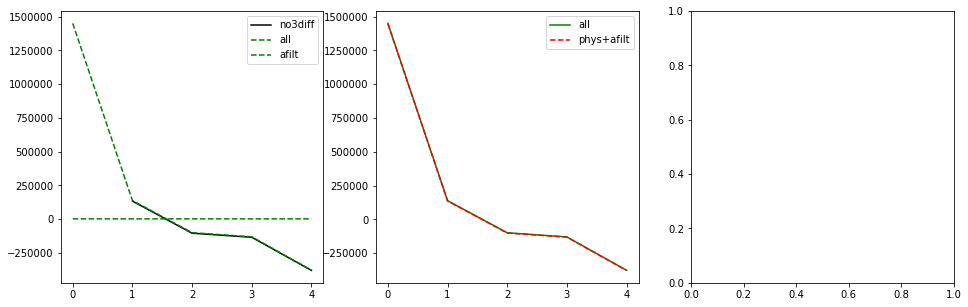

In [41]:
fig,ax=plt.subplots(1,3,figsize=(16,5))
ax[0].plot(range(1,5),no3diff,'k-',label='no3diff')
ax[0].plot(range(0,5),allSum,'g--',label='all')
ax[0].plot(range(0,5),afiltSum,'g--',label='afilt')
#ax[0].plot(range(0,5),afiltSum,'b--',label='afilt')
ax[0].legend()
ax[1].plot(range(0,5),allSum,'g-',label='all')
ax[1].plot(range(0,5),physSum+afiltSum,'r--',label='phys+afilt')
ax[1].legend()

In [6]:
fS=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0])
fS.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'NO3TVDY', 'ATY_NO3', 'ATY_PHY', 'DTY_NO3', 'DTY_PHY', 'LDF_NO3', 'VLDFNO3'])

In [18]:
fS=nc.Dataset(glob.glob(idir+'/SalishSea_1d_*_Sutil_V*.nc')[0])
fS.variables.keys()

dict_keys(['nav_lat', 'nav_lon', 'bounds_nav_lon', 'bounds_nav_lat', 'area', 'depthv', 'depthv_bounds', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'NO3TVDY', 'ATY_NO3', 'LDF_NO3', 'VLDFNO3'])

In [8]:
np.max(fS.variables['LDF_NO3'][0,:,:,:]),np.min(fS.variables['LDF_NO3'][0,:,:,:])

(11.247603, -16.783497)

In [19]:
fS.variables['ATY_NO3']

<class 'netCDF4._netCDF4.Variable'>
float32 ATY_NO3(time_counter, depthv, y, x)
    long_name: ---
    units: ---
    online_operation: average
    interval_operation: 40 s
    interval_write: 1 d
    cell_methods: time: mean (interval: 40 s)
    cell_measures: area: area
    _FillValue: 1e+20
    missing_value: 1e+20
    coordinates: time_centered nav_lat nav_lon
unlimited dimensions: time_counter
current shape = (5, 40, 1, 26)
filling on

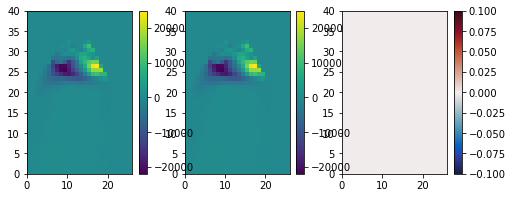

In [20]:
fig,ax=plt.subplots(1,3,figsize=(8,3))
m0=ax[0].pcolormesh(fS.variables['NO3TVDY'][0,:,0,:])
plt.colorbar(m0,ax=ax[0])
m1=ax[1].pcolormesh(fS.variables['ATY_NO3'][0,:,0,:])
plt.colorbar(m1,ax=ax[1])
m2=ax[2].pcolormesh(fS.variables['NO3TVDY'][0,:,0,:]-fS.variables['ATY_NO3'][0,:,0,:],cmap=cmocean.cm.balance)
plt.colorbar(m2,ax=ax[2])

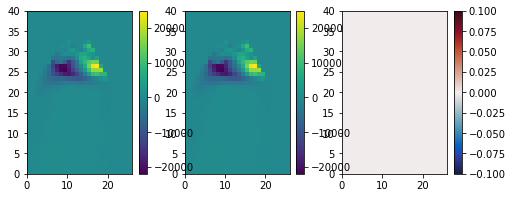

In [20]:
fig,ax=plt.subplots(1,3,figsize=(8,3))
m0=ax[0].pcolormesh(fS.variables['NO3TVDY'][0,:,0,:])
plt.colorbar(m0,ax=ax[0])
m1=ax[1].pcolormesh(fS.variables['ATY_NO3'][0,:,0,:])
plt.colorbar(m1,ax=ax[1])
m2=ax[2].pcolormesh(fS.variables['NO3TVDY'][0,:,0,:]-fS.variables['ATY_NO3'][0,:,0,:],cmap=cmocean.cm.balance)
plt.colorbar(m2,ax=ax[2])